## a = 0 <br>
## b = 1

In [45]:
df=pd.read_csv('productos.csv')
df_filtrado = df[df['nutriscore_grade'].isin(['a','b'])] # Filtrar por nutriscore 'a' o 'b'
df = df_filtrado.drop(columns=['brands', 'categories'])# Eliminar columnas de texto
df['nutriscore_grade'] = df['nutriscore_grade'].map({'a': 0, 'b': 1})# Convertir a 0 y 
df['nutriscore_grade']= df['nutriscore_grade'].astype('category')# cambiar el type del las columnas categoricas
#eliminar las filas con valores nulos
df = df.dropna()

In [7]:
df

,product_name,nutriscore_grade,energy_kcal,fat_100g,sugars_100g,salt_100g
0,Sidi Ali,0,0.0,0.000,1.40,0.000000
4,اكوافينا,0,0.0,0.000,0.00,0.000508
5,Lait,1,45.0,1.500,0.00,0.225000
6,CRISTALINE Eau De Source 1.5L,0,0.0,0.000,0.00,0.052500
7,Fromage blanc nature,0,80.6,12.000,0.00,0.000000
...,...,...,...,...,...,...
487,Crispy minis,1,385.0,5.000,17.00,0.194000
489,Grilletine au froment sans sucres ajoutés,1,425.0,9.600,1.70,0.890000
490,Semi-Skimmed 1.8% Fat Milk,1,50.0,1.600,4.80,0.107500
491,Seeded Batch,0,293.0,8.900,2.60,0.440000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 498
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   product_name      148 non-null    object  
 1   nutriscore_grade  148 non-null    category
 2   energy_kcal       148 non-null    float64 
 3   fat_100g          148 non-null    float64 
 4   sugars_100g       148 non-null    float64 
 5   salt_100g         148 non-null    float64 
dtypes: category(1), float64(4), object(1)
memory usage: 7.2+ KB


In [ ]:
#dividimos el dataset en dos partes, una para las variables dependientes y otra para las independientes
y=df['nutriscore_grade'].values
x=df.iloc[:,[2,3,4,5]].values

array([[0.00000000e+00, 0.00000000e+00, 1.40000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.08000000e-04],
       [4.50000000e+01, 1.50000000e+00, 0.00000000e+00, 2.25000000e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.25000000e-02],
       [8.06000000e+01, 1.20000000e+01, 0.00000000e+00, 0.00000000e+00],
       [5.80000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.50000000e-03],
       [1.01000000e+02, 6.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.50000000e+01, 1.50000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61000000e+02, 7.50000000e+00, 0.00000000e

In [14]:
# Separamos en conjunto de entrenamiento y conjunto de test
from sklearn.model_selection import train_test_split 
X_tr, X_te, Y_tr, Y_te = train_test_split(x,y, test_size=0.3,random_state=23,stratify=y)

In [35]:
#estandarizamos los datos
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_tr)
X_train_std = sc.transform(X_tr)
X_test_std = sc.transform(X_te)

In [36]:
# Usamos el clasificador RandomForestClassifier de sklearn con distintos arboles

from sklearn.ensemble import RandomForestClassifier
#estimadores=[3,10,25]
forest_3 = RandomForestClassifier(criterion='gini', n_estimators=3,
                                random_state=23, n_jobs=-1)
forest_3.fit(X_tr, Y_tr)

forest_10 = RandomForestClassifier(criterion='gini', n_estimators=10,
                                random_state=23, n_jobs=-1)
forest_10.fit(X_tr, Y_tr)

forest_25 = RandomForestClassifier(criterion='gini', n_estimators=25,
                                random_state=23, n_jobs=-1)
forest_25.fit(X_tr, Y_tr)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=23)

In [37]:
# Predecimos con diferente 
y_pred_3=forest_3.predict(X_te)
y_pred_10=forest_10.predict(X_te)
y_pred_25=forest_25.predict(X_te)

In [38]:
#Mostrar los resultados de los diferentes arboles
from sklearn.metrics import accuracy_score 
pred=[y_pred_3,y_pred_10,y_pred_25]
name=['y_pred_3','y_pred_10','y_pred_25']
for i in range(len(pred)):
    accuracy = accuracy_score(Y_te,pred[i])
    print(f'Predicciones: {name[i]} , Presición:{accuracy}')


Predicciones: y_pred_3 , Presición:0.6
Predicciones: y_pred_10 , Presición:0.6444444444444445
Predicciones: y_pred_25 , Presición:0.6666666666666666


In [39]:

print(f'El modelo de mejor rendimiento tiene 25 arboles y su rendimiento es {accuracy_score(Y_te,y_pred_25)}')

El modelo de mejor rendimiento tiene 25 arboles y su rendimiento es 0.6666666666666666


Matriz de confusion

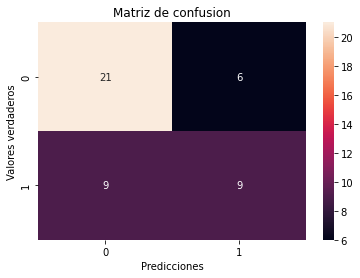

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred = forest_25.predict(X_te)

# Matriz de confusion
cm = confusion_matrix(Y_te, Y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de confusion')
plt.show()


In [42]:
#Intentar una predicción con nuevos datos.
nuevos_datos = [0.5, 6, 3.2, 10]
y_pred_nuevo = forest_10.predict([nuevos_datos])
print("Prediccion NutriScore:", y_pred_nuevo[0])

Prediccion NutriScore: 0
